In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-05-27 18:29:56.535912: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-27 18:29:56.554349: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA A40 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 84 deviceMemorySize: 44.56GiB deviceMemoryBandwidth: 648.29GiB/s
2022-05-27 18:29:56.554634: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-27 18:29:56.556149: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-27 18:29:56.557802: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-27 18:29:56.558104: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-0

In [3]:
stream = "mock"

In [4]:
df, file = load_file(stream = stream)

../gaia_data/mock_streams/gaiamock_ra156.2_dec57.5_stream_feh-1.6_v3_863.npy


### Prepare datasets for training

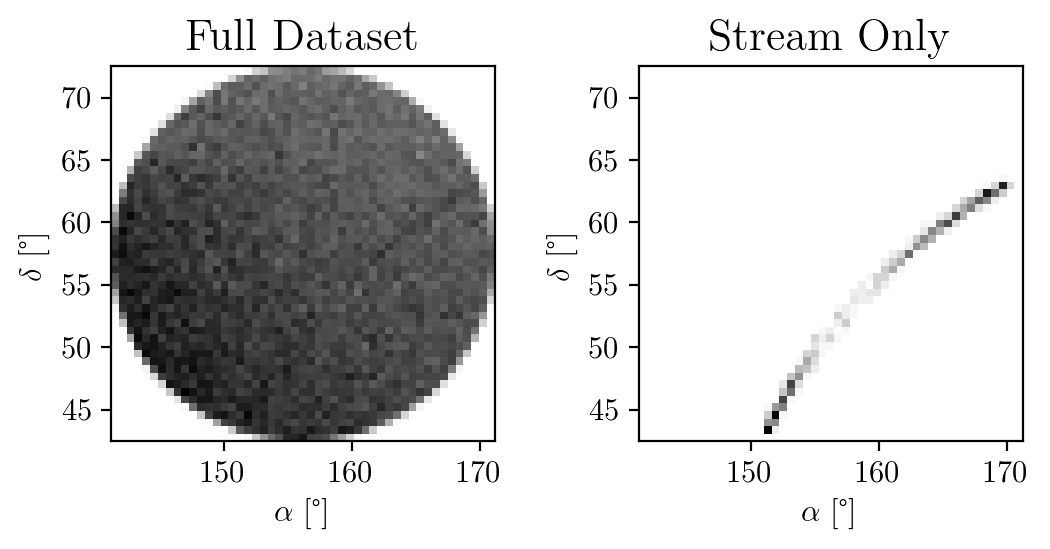

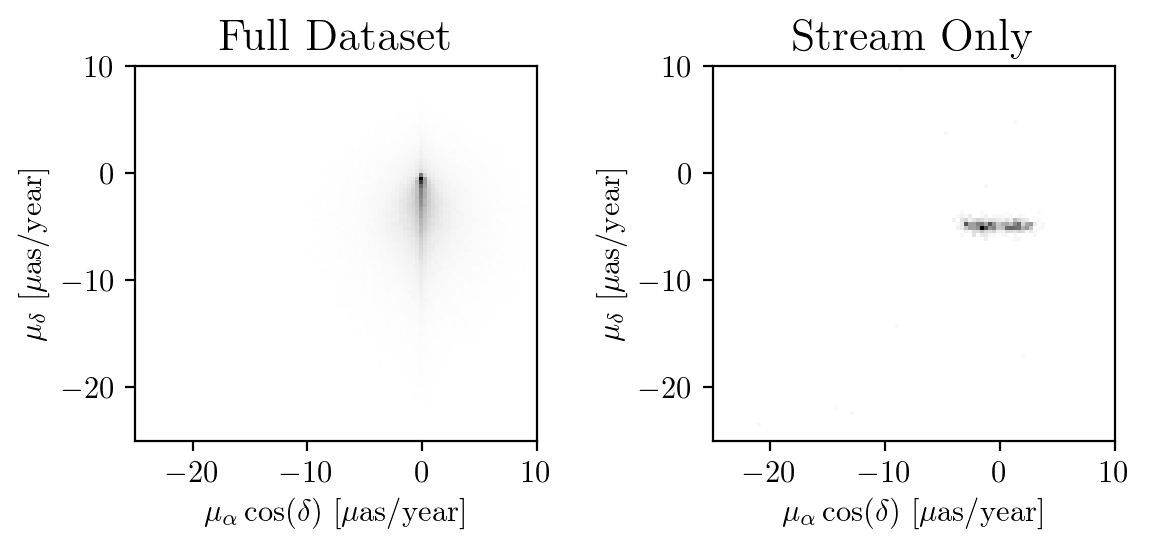

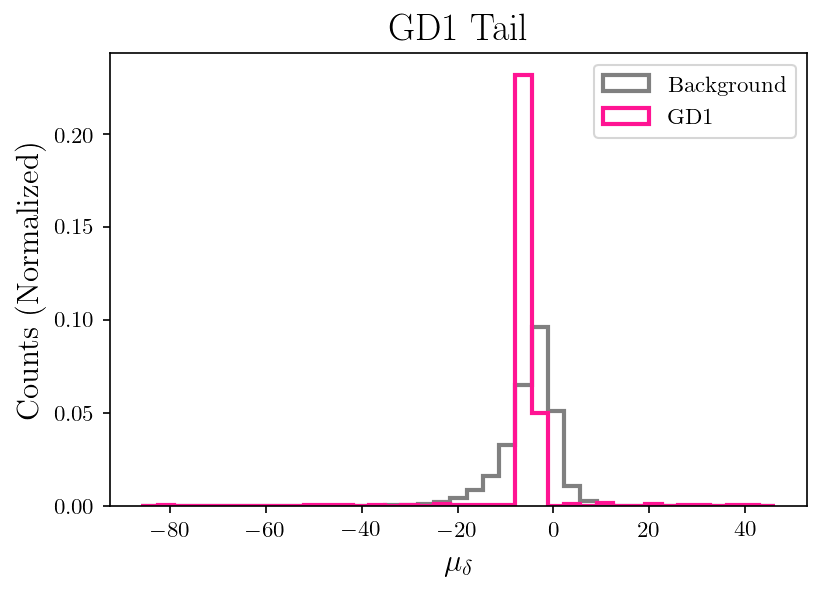

In [6]:
visualize_stream(df, save_folder="mock")

Sideband region: [-7.9,-1.7]
Signal region: [-6.4,-3.3]
Total counts: SR = 114,831, SB = 107,177


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/functions.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Signal region has 712 stream and 114,119 bkg events (0.62%).
Sideband region has 1 stream and 107,176 bkg events (0.00%).
f_sig = 668.7X f_sideband.


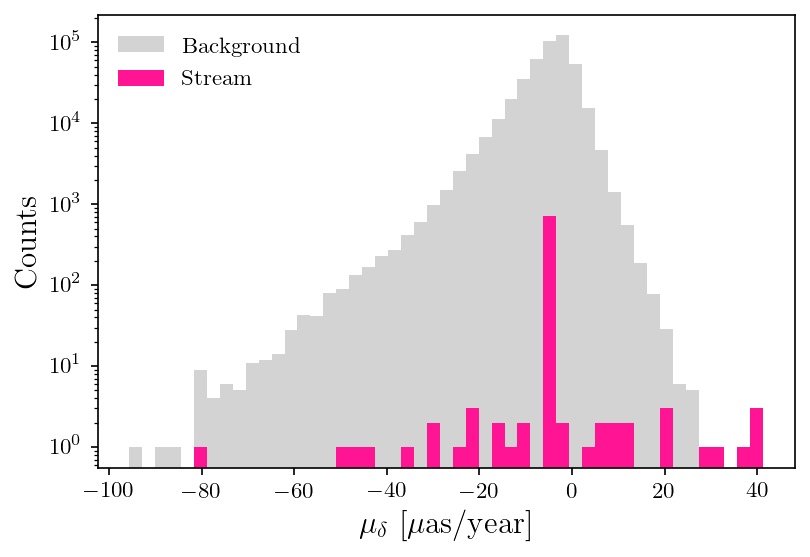

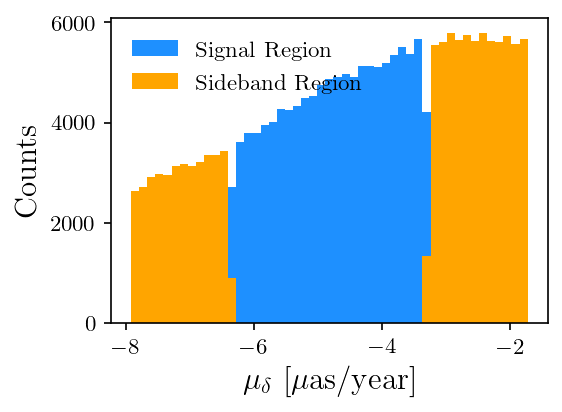

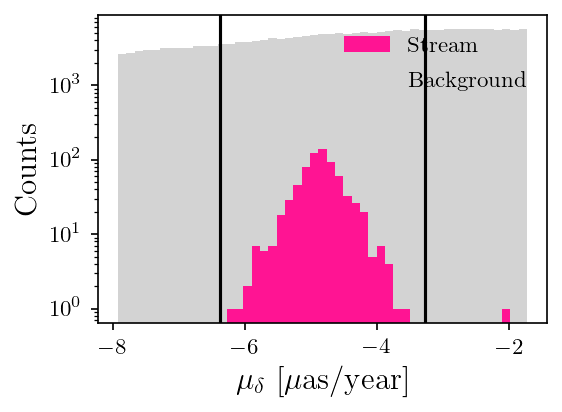

In [66]:
df = signal_sideband(df, stream = stream, save_folder = "mock")

# Train

In [67]:
tf.keras.backend.clear_session()

Not using sample weights
Training on 155,405 events.
Epoch 1/2000
156/156 [==============================] - 1s 4ms/step - loss: 0.6949 - accuracy: 0.5085 - val_loss: 0.6923 - val_accuracy: 0.5223
Epoch 2/2000
156/156 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5141 - val_loss: 0.6919 - val_accuracy: 0.5269
Epoch 3/2000
156/156 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6916 - val_accuracy: 0.5266
Epoch 4/2000
156/156 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5192 - val_loss: 0.6914 - val_accuracy: 0.5271
Epoch 5/2000
156/156 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5229 - val_loss: 0.6914 - val_accuracy: 0.5269
Epoch 6/2000
156/156 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5229 - val_loss: 0.6910 - val_accuracy: 0.5276
Epoch 7/2000
156/156 [==============================] - 0s 3ms/step - loss: 0.6917 

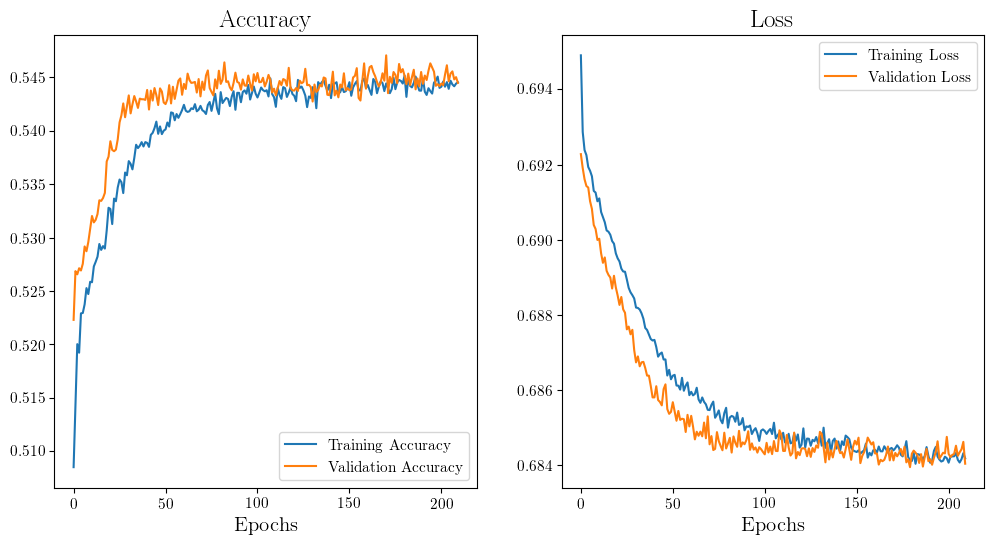

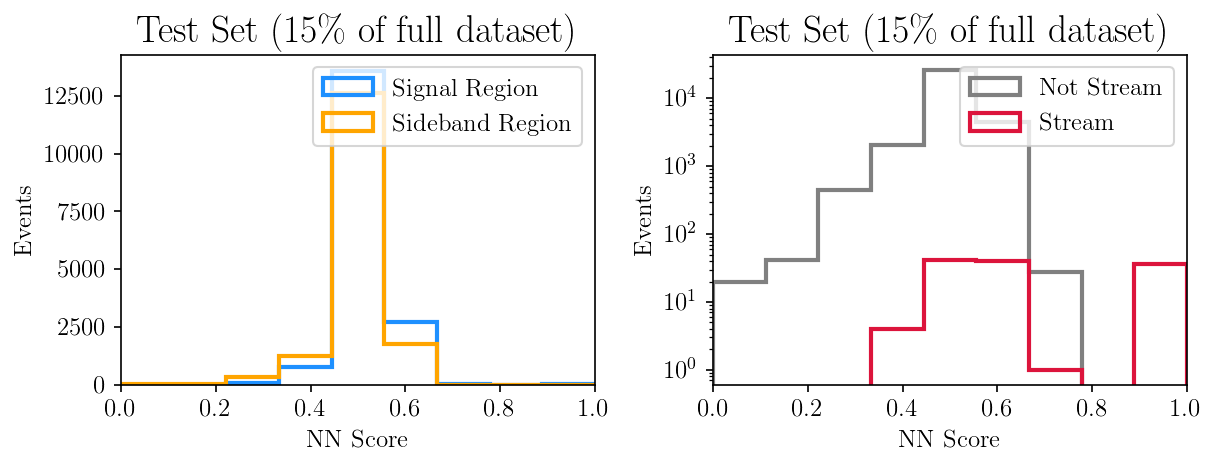

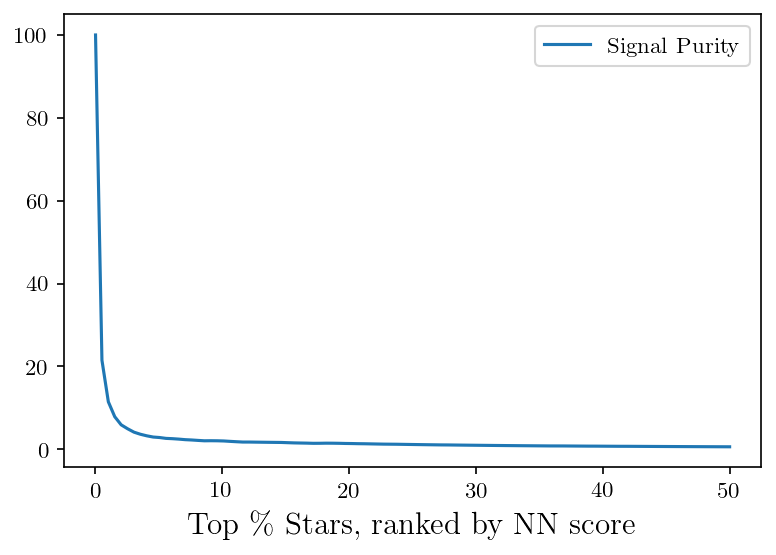

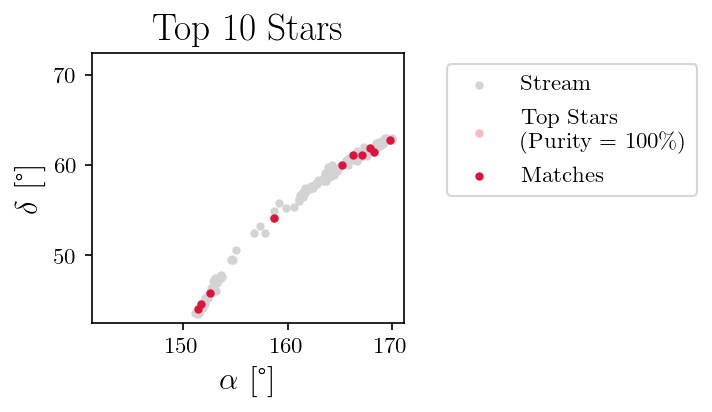

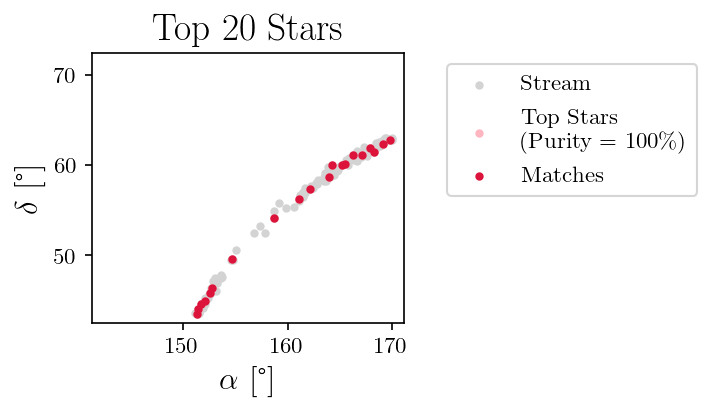

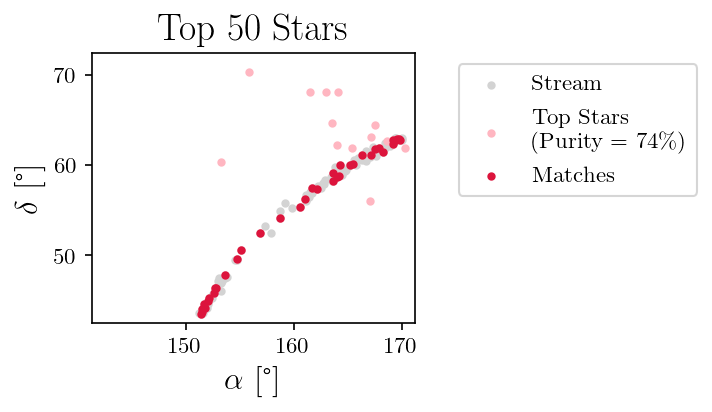

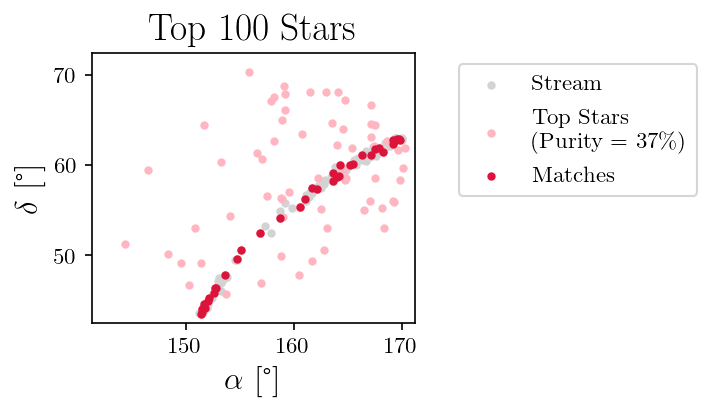

In [68]:
test = train(df, 
      save_folder = "mock",
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 32, 
      batch_size = 1000, #15000, 
      dropout = 0.2, 
      epochs = 2000, 
      l2_reg = 0,
      patience = 30
            )